In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('report.csv')

In [3]:
data.head(15)

,Context Limit,Batch Size,Session,Query,Time Taken
0,4K,256,Same Chat,2+2,20 sec
1,4K,256,Same Chat,Fibo,1 min 47 sec
2,4K,256,Same Chat,Hi,4 min 43 sec
3,4K,256,New Chat,Fibo,1 min 40 sec
4,4K,256,New Chat,4/2,1 min 8 sec
5,2K,64,Same Chat,Fibo,30 sec
6,2K,64,Same Chat,Hi,1 min 5 sec
7,2K,64,Same Chat,2+9,5 sec
8,2K,64,Same Chat,Capital,1 min 50 sec
9,16K,64,Same Chat,Fibo,1 min 18 sec


In [4]:
data.shape

(15, 5)

In [5]:
def parse_time(time_str):
    # Convert to string first (to avoid int/float issues)
    time_str = str(time_str).strip()
    parts = time_str.split()
    seconds = 0
    
    if "min" in parts:
        minutes = int(parts[0])
        seconds += minutes * 60
        if "sec" in parts:
            sec_index = parts.index("sec")
            seconds += int(parts[sec_index - 1])
    elif "sec" in parts:
        seconds = int(parts[0])
    else:
        # If it's just a number like "20"
        seconds = int(parts[0])
    
    return seconds

# Apply safely
data["TimeSeconds"] = data["Time Taken"].apply(parse_time)
data.head(15)


,Context Limit,Batch Size,Session,Query,Time Taken,TimeSeconds
0,4K,256,Same Chat,2+2,20 sec,20
1,4K,256,Same Chat,Fibo,1 min 47 sec,107
2,4K,256,Same Chat,Hi,4 min 43 sec,283
3,4K,256,New Chat,Fibo,1 min 40 sec,100
4,4K,256,New Chat,4/2,1 min 8 sec,68
5,2K,64,Same Chat,Fibo,30 sec,30
6,2K,64,Same Chat,Hi,1 min 5 sec,65
7,2K,64,Same Chat,2+9,5 sec,5
8,2K,64,Same Chat,Capital,1 min 50 sec,110
9,16K,64,Same Chat,Fibo,1 min 18 sec,78


In [6]:
avg_times = data.groupby("Context Limit")["TimeSeconds"].mean().reset_index()
print(avg_times)


  Context Limit  TimeSeconds
0           16K    64.333333
1            2K    52.500000
2           32K   176.333333
3            4K   115.600000


## 32K CONTEXT LIMIT REPORT

In [7]:
DATA_32K = pd.read_csv('performance_32k.csv')

In [8]:
DATA_32K.head()

,prompt_id,prompt_text,time_taken_same_chat_sec,time_taken_new_chat_sec,output_length,context_size_tokens,platform,os_version,notes
0,1,Fibonacci series,112,86.0,High,32000,Android,14,Offline model performance (user-provided timings)
1,2,Capital of India,89,93.0,High,32000,Android,14,Offline model performance (user-provided timings)
2,3,24/4*9,40,18.0,High,32000,Android,14,Offline model performance (user-provided timings)
3,4,Diameter of Earth?,14,11.0,Small,32000,Android,14,Offline model performance (user-provided timings)


In [9]:
DATA_32K.shape

(4, 9)

In [10]:
### AVG Time Taken
same_chat_avg_32k = DATA_32K["time_taken_same_chat_sec"].mean()
new_chat_avg_32k = DATA_32K["time_taken_new_chat_sec"].mean()
print(f"Average Time Taken (Same Chat) 32K: {same_chat_avg_32k:.2f} sec")
print(f"Average Time Taken (New Chat) 32K: {new_chat_avg_32k:.2f} sec")

Average Time Taken (Same Chat) 32K: 63.75 sec
Average Time Taken (New Chat) 32K: 52.00 sec


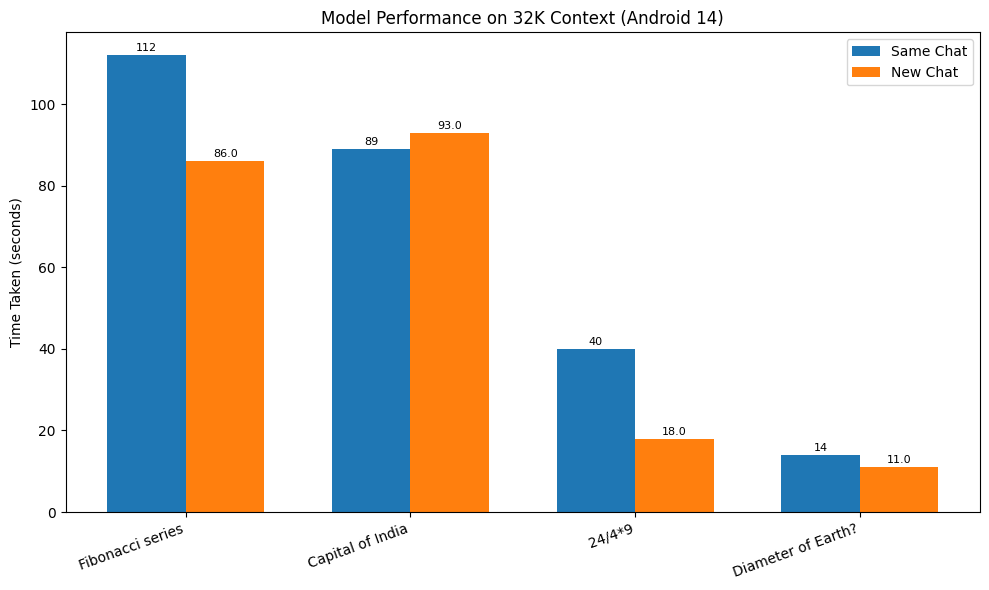

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV
df = pd.read_csv("performance_32k.csv")

# Plot grouped bar chart (same chat vs new chat)
plt.figure(figsize=(10,6))

bar_width = 0.35
x = range(len(df))

# Bars
plt.bar([i - bar_width/2 for i in x], df["time_taken_same_chat_sec"], 
        width=bar_width, label="Same Chat")
plt.bar([i + bar_width/2 for i in x], df["time_taken_new_chat_sec"].fillna(0), 
        width=bar_width, label="New Chat")

# Labels & Title
plt.xticks(x, df["prompt_text"], rotation=20, ha="right")
plt.ylabel("Time Taken (seconds)")
plt.title("Model Performance on 32K Context (Android 14)")
plt.legend()

# Annotate values
for i, val in enumerate(df["time_taken_same_chat_sec"]):
    plt.text(i - bar_width/2, val + 1, str(val), ha="center", fontsize=8)

for i, val in enumerate(df["time_taken_new_chat_sec"].fillna(0)):
    if val > 0:
        plt.text(i + bar_width/2, val + 1, str(val), ha="center", fontsize=8)

plt.tight_layout()
plt.savefig("performance_32k.png", bbox_inches='tight', dpi=300)
plt.show()


#### 4K CONTEXT LIMIT PERFORMANCE

In [12]:
compare_data = pd.read_csv("LFM_model_performance_comparison.csv")
compare_data.head()

,Context Limit,Batch Size,Prompt,Time Taken (Same Chat),Time Taken (New Chat),Output Length
0,32K,128,Fibonacci Series,1 min 52 sec,1 min 26 sec,NaN
1,32K,128,Capital of India,1 min 29 sec,1 min 33 sec,NaN
2,32K,128,24/4*9,40 sec,18 sec,NaN
3,32K,128,Diameter of Earth,14 sec,11 sec,Small
4,4K,128,Fibonacci Series,1 min 24 sec,1 min 6 sec,NaN


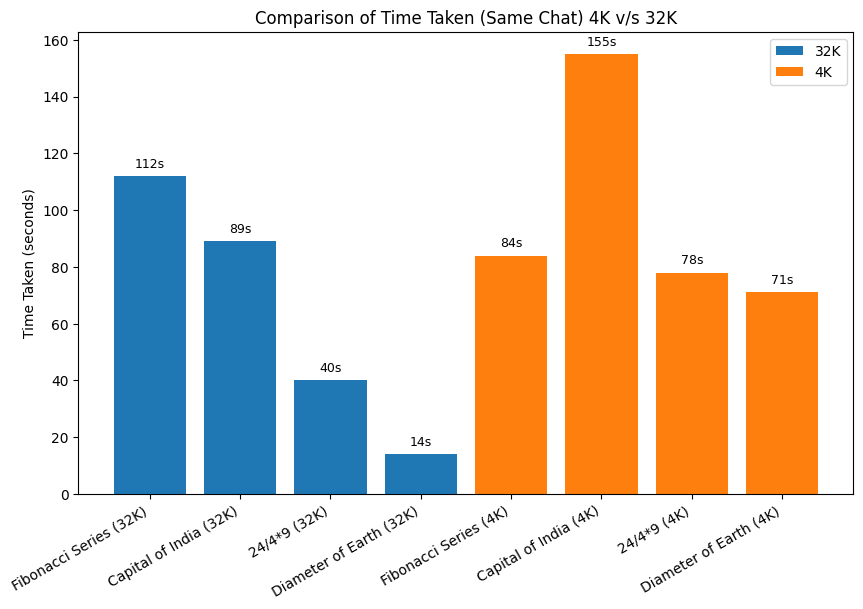

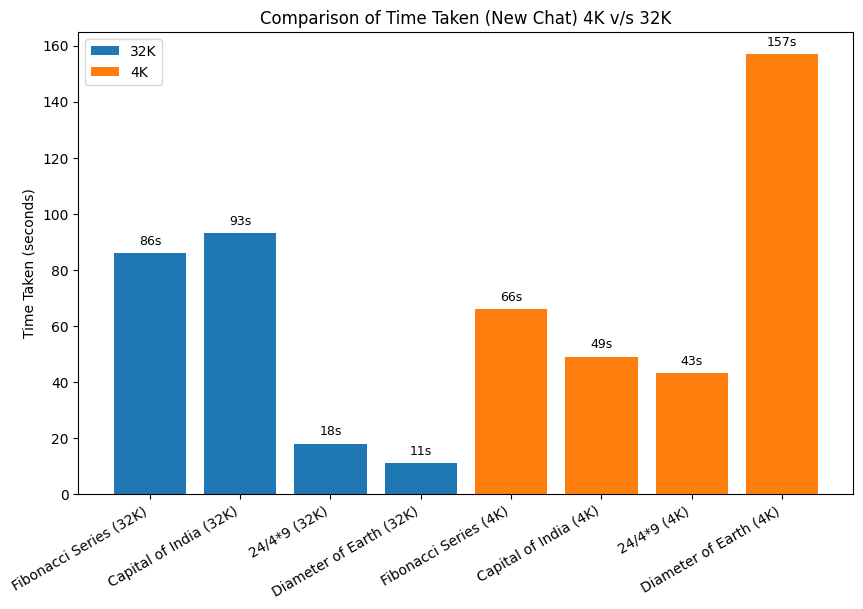

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

df = compare_data  # your DataFrame

# Convert time to seconds
def to_seconds(t):
    if t == "" or pd.isna(t):
        return None
    parts = t.split()
    total = 0
    for i, p in enumerate(parts):
        if "min" in p:
            total += int(parts[i-1]) * 60
        if "sec" in p:
            total += int(parts[i-1])
    return total

df["Same Chat (sec)"] = df["Time Taken (Same Chat)"].apply(to_seconds)
df["New Chat (sec)"] = df["Time Taken (New Chat)"].apply(to_seconds)

# Chart 1: Same Chat comparison
plt.figure(figsize=(10,6))
for ctx in df["Context Limit"].unique():
    subset = df[df["Context Limit"] == ctx]
    bars = plt.bar(subset["Prompt"] + " (" + ctx + ")", subset["Same Chat (sec)"], label=ctx)
    # Add annotations above bars
    for bar in bars:
        height = bar.get_height()
        if not pd.isna(height):
            plt.text(bar.get_x() + bar.get_width()/2, height + 2, f"{int(height)}s",
                     ha="center", va="bottom", fontsize=9)

plt.ylabel("Time Taken (seconds)")
plt.title("Comparison of Time Taken (Same Chat) 4K v/s 32K")
plt.xticks(rotation=30, ha="right")
plt.legend()
plt.savefig("same_chat_comparison.png", bbox_inches='tight', dpi=300)
plt.show()


# Chart 2: New Chat comparison
plt.figure(figsize=(10,6))
for ctx in df["Context Limit"].unique():
    subset = df[df["Context Limit"] == ctx]
    bars = plt.bar(subset["Prompt"] + " (" + ctx + ")", subset["New Chat (sec)"], label=ctx)
    # Add annotations above bars
    for bar in bars:
        height = bar.get_height()
        if not pd.isna(height):
            plt.text(bar.get_x() + bar.get_width()/2, height + 2, f"{int(height)}s",
                     ha="center", va="bottom", fontsize=9)

plt.ylabel("Time Taken (seconds)")
plt.title("Comparison of Time Taken (New Chat) 4K v/s 32K")
plt.xticks(rotation=30, ha="right")
plt.legend()
plt.savefig("new_chat_comparison.png", bbox_inches='tight', dpi=300)
plt.show()


## LFM2 1.5B v/s Qwen1.5 1.8B

In [14]:
model_compare_data = pd.read_csv("model_comparison.csv")
model_compare_data.head()

,Prompt,Qwen 32K (sec),LFM 32K (sec)
0,Fibonacci Series,26,86
1,Capital of India,28,89
2,Diameter of Earth,25,14
3,24/4*9,18,40


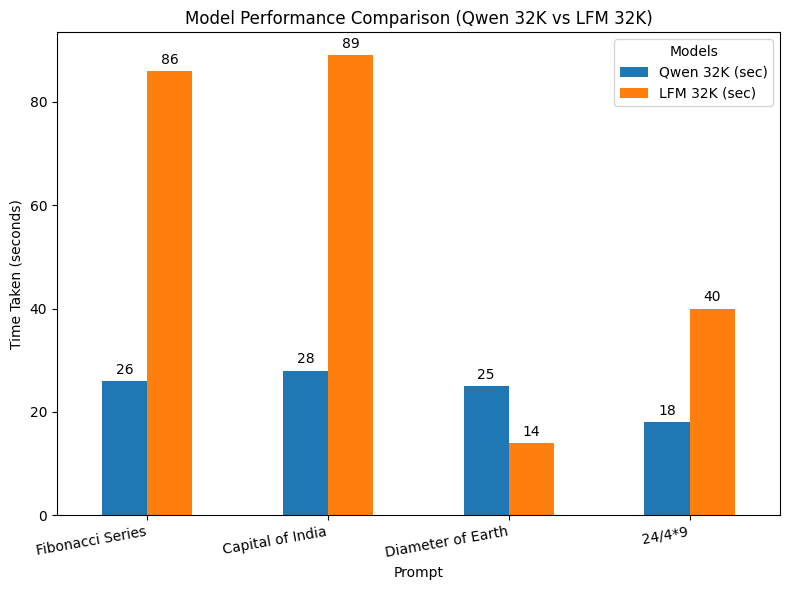

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Data
data = model_compare_data

# Create DataFrame
df = pd.DataFrame(data)

colors = ["#001f3f", "#ff9966"]
# Plot vertical bar chart
ax = df.plot(
    x="Prompt",
    y=["Qwen 32K (sec)", "LFM 32K (sec)"],
    kind="bar",
    figsize=(8, 6),
    # color=colors
)

plt.ylabel("Time Taken (seconds)")
plt.xlabel("Prompt")
plt.xticks(rotation=10, ha="right")
plt.title("Model Performance Comparison (Qwen 32K vs LFM 32K)")
plt.legend(title="Models")
for container in ax.containers:
    ax.bar_label(container, label_type="edge", padding=3, fontsize=10, color="black")

plt.tight_layout()
plt.savefig("LFM_VS_QWEN.png", bbox_inches='tight', dpi=300)
plt.show()


#### AVG TIME

In [16]:
qwen_avg_time = model_compare_data["Qwen 32K (sec)"].mean()
lfm_avg_time = model_compare_data["LFM 32K (sec)"].mean()

print("AVG TIME:")
print(f"Qwen 32K Average Time: {qwen_avg_time:.2f} sec")
print(f"LFM 32K Average Time: {lfm_avg_time:.2f} sec")

AVG TIME:
Qwen 32K Average Time: 24.25 sec
LFM 32K Average Time: 57.25 sec


#### MODEL COMPARISION ALL 4

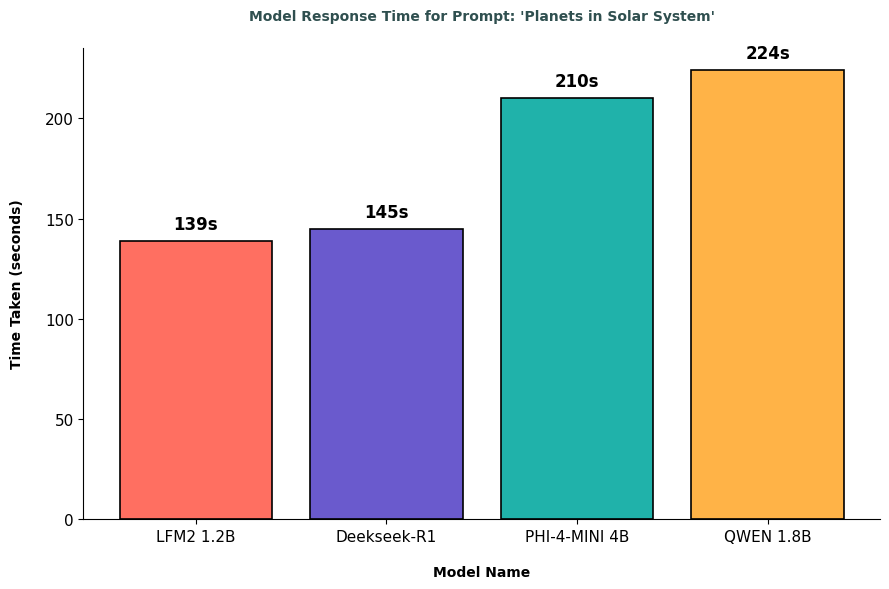

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ["LFM2 1.2B", "Deekseek-R1","PHI-4-MINI 4B", "QWEN 1.8B" ]
times = [139,145,210, 224 ]  # seconds

# Vibrant custom colors
colors = ["#ff6f61", "#6a5acd", "#20b2aa", "#ffb347"]  
# coral, slateblue, teal, orange

plt.figure(figsize=(9,6), facecolor="white")
bars = plt.bar(models, times, color=colors, edgecolor="black", linewidth=1.2)

# Add annotations above each bar
for bar, time in zip(bars, times):
    plt.text(bar.get_x() + bar.get_width()/2, 
             bar.get_height() + 4, 
             f"{time}s", 
             ha='center', va='bottom', fontsize=12, fontweight='bold', color="black")

# Labels & Title with more spacing (labelpad)
plt.xlabel("Model Name", fontsize=10, fontweight="bold", labelpad=15)
plt.ylabel("Time Taken (seconds)", fontsize=10, fontweight="bold", labelpad=15)
plt.title("Model Response Time for Prompt: 'Planets in Solar System'", 
          fontsize=10, fontweight="bold", pad=20, color="#2F4F4F")

# Remove grid + make clean borders
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
for spine in ["top", "right"]:
    plt.gca().spines[spine].set_visible(False)

plt.tight_layout()
plt.savefig("model_comparison_all.png", bbox_inches='tight', dpi=300)
plt.show()


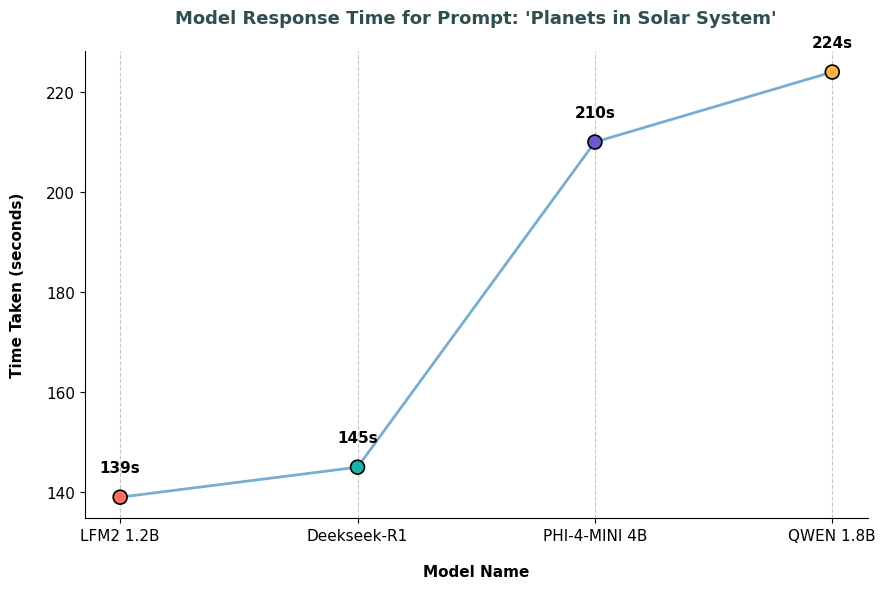

In [45]:
import matplotlib.pyplot as plt

# Data
models = ["LFM2 1.2B", "Deekseek-R1", "PHI-4-MINI 4B", "QWEN 1.8B"]
times = [139, 145, 210, 224]  # seconds

# Colors for each model dot
dot_colors = ["#ff6f61", "#20b2aa", "#6a5acd", "#ffb347"]  
# coral, teal, slateblue, orange

plt.figure(figsize=(9,6), facecolor="white")

# Plot line (single color for connection)
plt.plot(models, times, linestyle="-", linewidth=2, color="#1f77b4", alpha=0.6)

# Plot scatter points with different colors
plt.scatter(models, times, c=dot_colors, s=100, edgecolor="black", linewidth=1.2, zorder=5)

# Add annotations on each point
for x, y, c in zip(models, times, dot_colors):
    plt.text(x, y + 5, f"{y}s", ha="center", fontsize=11, fontweight="bold", color="black")

# Labels & Title
plt.xlabel("Model Name", fontsize=11, fontweight="bold", labelpad=15)
plt.ylabel("Time Taken (seconds)", fontsize=11, fontweight="bold", labelpad=15)
plt.title("Model Response Time for Prompt: 'Planets in Solar System'",
          fontsize=13, fontweight="bold", pad=20, color="#2F4F4F")

# Clean look (remove top/right borders)
for spine in ["top", "right"]:
    plt.gca().spines[spine].set_visible(False)

plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("model_comparison_all_line.png", bbox_inches='tight', dpi=300)
plt.show()


### BENCHMARK REPORT

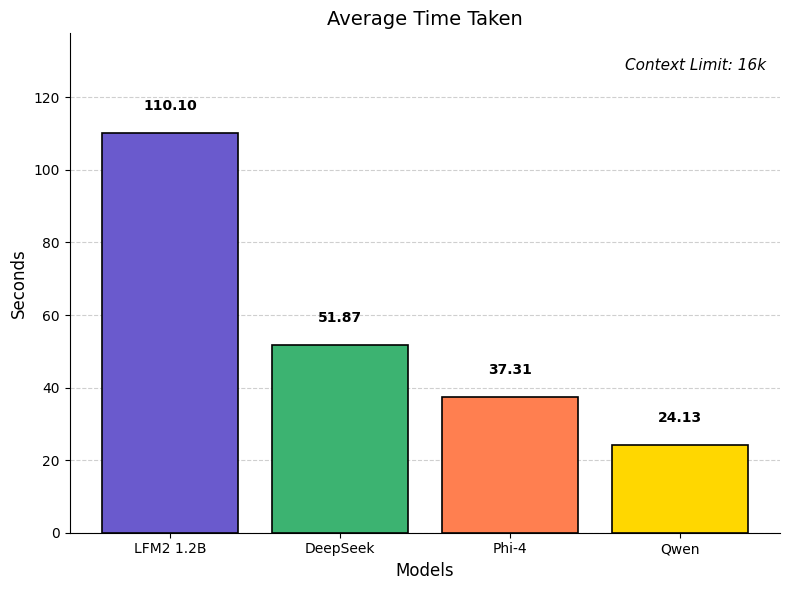

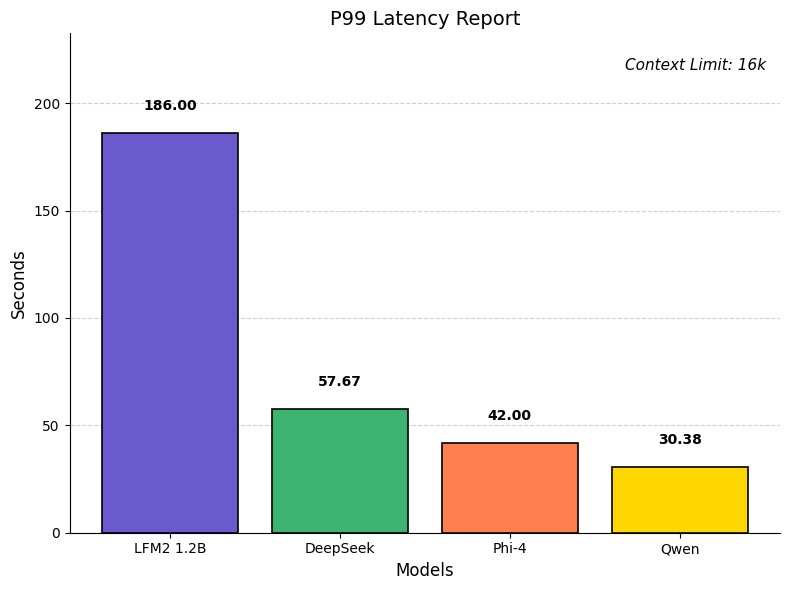

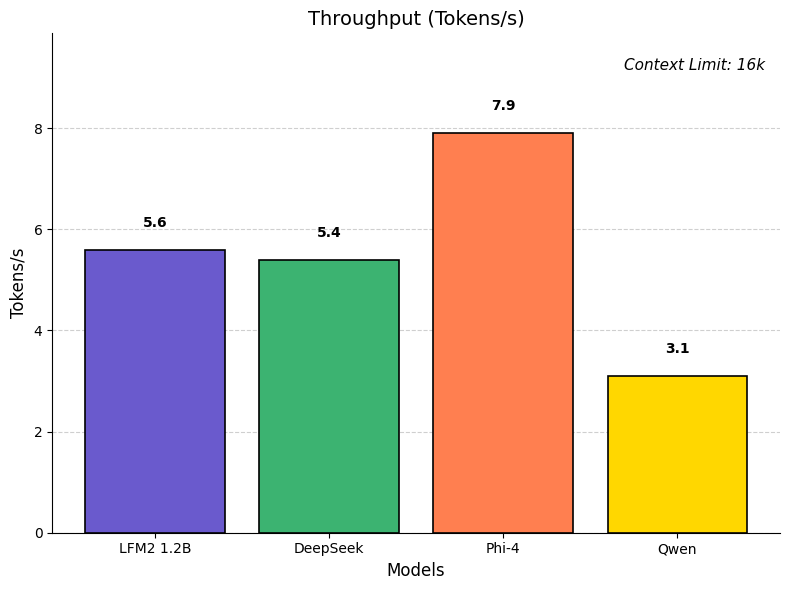

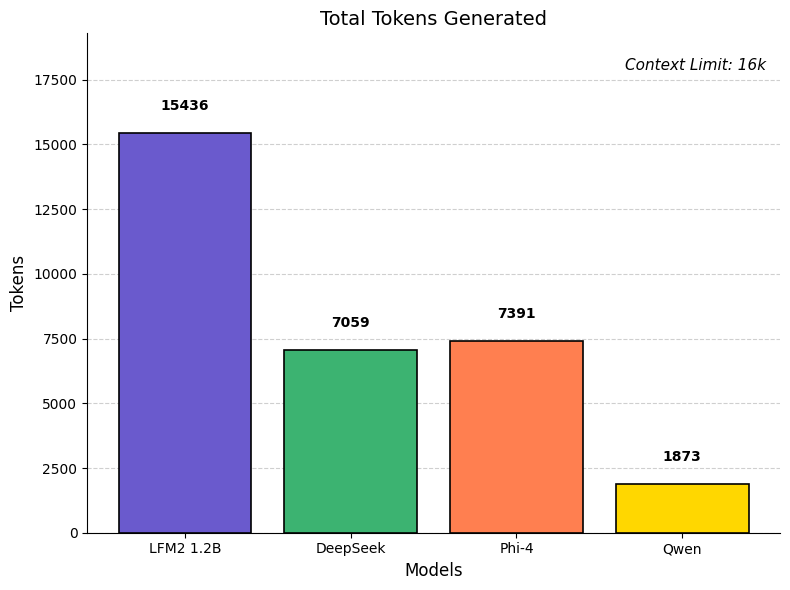

✅ Saved and displayed: avg_time.png, p99_time.png, tokens_per_s.png, total_tokens.png


In [1]:
import matplotlib.pyplot as plt

models = ["LFM2 1.2B", "DeepSeek", "Phi-4", "Qwen"]

# Example data (ms → will be converted to seconds)
avg_time_ms   = [110103, 51869, 37314, 24131]     # average latency per prompt (ms)
p99_time_ms   = [186002, 57669, 42000, 30381]     # 99th percentile latency (ms)
tokens_per_s  = [5.6, 5.4, 7.9, 3.1]          # throughput (tokens/s)
total_tokens  = [15436, 7059, 7391, 1873]       # total tokens generated

# Convert ms → seconds
avg_time_s = [t/1000 for t in avg_time_ms]
p99_time_s = [t/1000 for t in p99_time_ms]

# Distinct colors for each model
colors = ["#6A5ACD", "#3CB371", "#FF7F50", "#FFD700"]  
# SlateBlue, MediumSeaGreen, Coral, Gold

def plot_bar(x, y, title, ylabel, filename, decimal=2):
    fig, ax = plt.subplots(figsize=(8,6))

    # Simple rectangular bars
    bars = ax.bar(x, y, color=colors, edgecolor="black", linewidth=1.2, zorder=3)

    # Add value annotations with spacing
    ymax = max(y) if max(y) > 0 else 1
    for bar, val in zip(bars, y):
        ax.text(bar.get_x() + bar.get_width()/2, 
                val + ymax*0.05, 
                f"{val:.{decimal}f}", 
                ha="center", va="bottom", fontsize=10, fontweight="bold")

    # Horizontal grid
    ax.grid(axis="y", linestyle="--", alpha=0.6, zorder=0)

    # Increase ylim to avoid annotation overlap
    ax.set_ylim(0, ymax*1.25)

    # Titles and labels
    ax.set_title(title, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.set_xlabel("Models", fontsize=12)

    # Remove top and right borders (spines)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    # Add context limit note
    ax.text(0.98, 0.95, "Context Limit: 16k", transform=ax.transAxes,
            ha="right", va="top", fontsize=11, style="italic")

    plt.tight_layout()
    plt.savefig(filename, dpi=300)
    plt.show()
    plt.close()

# ==============================
# Generate 4 charts
# ==============================
plot_bar(models, avg_time_s, "Average Time Taken", "Seconds", "avg_time.png", decimal=2)
plot_bar(models, p99_time_s, "P99 Latency Report", "Seconds", "p99_time.png", decimal=2)
plot_bar(models, tokens_per_s, "Throughput (Tokens/s)", "Tokens/s", "tokens_per_s.png", decimal=1)
plot_bar(models, total_tokens, "Total Tokens Generated", "Tokens", "total_tokens.png", decimal=0)

print("✅ Saved and displayed: avg_time.png, p99_time.png, tokens_per_s.png, total_tokens.png")
